# Customer Segmentation

#### Libraries that will be used are imported.

In [1]:
import numpy as np
import pandas as pd
import sqlite3
from datetime import datetime as dt, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabaz_score
import plotly.express as px
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows',2000)
%matplotlib inline

**The dataset is imported and the first five rows are read.**
* _**Reading the columns and first five rows ensures the dataset has been correctly loaded.**_

In [2]:
df = pd.read_csv('data.csv',encoding='ISO-8859-1')
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

### SQL - Structured Query Language

**The dataset is exported into a SQL database and imported back into a dataframe.**<br>
**The following steps are taken to acheive this:**
1. _**Save column names into three separate lists.**_
2. _**Use the lists to create three separate dataframes.**_
3. _**Connect to an SQL database.**_
4. _**Export the three dataframes to the SQL database.**_
5. _**Import the data back into dataframes.**_
6. _**Close the connection.**_
7. _**Merge the imported dataframes into one.**_

In [3]:
customers_list = []
products_list = []
orders_list = []
for col in df.columns :
    if col.startswith('Customer') :
        customers_list.append(col)
    elif col.startswith('Product') :
        products_list.append(col)
    else :
        orders_list.append(col)

In [4]:
customers = df[customers_list]
products = df[products_list]
orders = df[orders_list]

In [5]:
conn = sqlite3.connect('segmentation.db')

In [6]:
customers.to_sql(name = 'customers',con = conn, index = False, if_exists = 'replace')
products.to_sql(name = 'products', con = conn, index = False, if_exists = 'replace')
orders.to_sql(name = 'orders', con = conn, index = False, if_exists = 'replace')

In [7]:
sql_query = 'SELECT * FROM customers'
customers_df = pd.read_sql(sql_query, conn)
customers_df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,None,NaN,NaN,None,None,None,1437764306,0.0
1,3,John,Smith,Company1,1386089139,NaN,NaN,None,NaN,NaN,None,None,None,1437764354,0.0
2,3,John,Smith,Company1,1386089139,NaN,NaN,None,NaN,NaN,None,None,None,1437764354,0.0
3,4,James,Anderson,None,1386780263,NaN,NaN,None,NaN,NaN,None,None,None,1437762646,0.0
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,None,NaN,NaN,None,None,None,1437764316,0.0


In [8]:
sql_query = 'SELECT * FROM products'
products_df = pd.read_sql(sql_query, conn)
products_df.head()

,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,2310.0,0.0,None,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",None,80.70,57.64,NaN,44.00,0.0,NaN,None,1.463163e+09,1.0,1.088440e+13,MEDLINE,MDS86850EGS,None,Green,None,62.0,B00I6GQE0A,None,health-care-products,NaN,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,None,NaN,None,None,NaN,None,8000064C-1434298761,1.450325e+09,None,None,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...",None,None,None,"Basic Lightweight Rollators For Adults, With S...",None,None,None,None,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,None,1 EA,NaN,NaN,NaN,None,None,NaN,None,None,None,None,E0149 +E0156,1.0,None,0.0,None,136.0,NaN,None,None,0.0,None,None,None,None,24.80,7.50,30.40,NaN,None,None,NaN,None,None,None,None,None,None,PF61071,0.0,None
1,177.0,1.0,None,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,None,14.41,10.29,5.0,1.87,65.0,NaN,None,1.462370e+09,1.0,1.008020e+13,MEDLINE,DYNC1674H,None,None,None,62.0,B000QF7Y76,None,health-care-products,NaN,None,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,None,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,80008C35-1438901283,1.450322e+09,None,None,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",<ul><li> Only Medline drain bags have a slide...,None,None,None,Urinary Drain Bags | MEDLINE - DYNC1674H,None,None,None,None,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,None,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,None,None,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,None,0.0,OFF sale cause it is an RX item,0.0,NaN,None,None,0.0,None,None,None,None,8.00,7.00,1.50,NaN,None,None,NaN,None,None,None,None,None,None,PF02132,NaN,None
2,1.0,0.0,None,sub-product-detail.html,1.0,3.0,"Sens

In [9]:
sql_query = 'SELECT * FROM orders'
orders_df = pd.read_sql(sql_query, conn)
orders_df.head()

,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags
0,3758,797,Christy,Dill,Company0,3758,NaN,None,NaN,USD,None,57.20,0.0,9.95,13.0,2.86,None,None,None,NaN,None,NaN,64.29,NaN,fedex,11|Ground,None,None,NaN,5.7204E+14,3.0,1.426019e+09,None,authorize.net,None,64.29,None,6993607863,510142,None,1,1426019099,1.438868e+09,1.426101e+09,None,Insured By Eye4Fraud,None,None,None,None,NaN,NaN,0.0,5284,3758,2310.0,"Basic Rollators, Green",None,None,None,1,57.20,44.00,None,None,NaN,None,NaN
1,23,3,John,Smith,Company1,23,NaN,None,NaN,USD,None,20.00,NaN,9.99,NaN,NaN,None,None,None,NaN,None,NaN,29.99,NaN,fedex,11|Ground,None,None,NaN,1.28597E+14,3.0,1.386090e+09,None,authorize.net,None,29.99,None,0,0,None,1,1386090455,1.440529e+09,1.386103e+09,None,None,None,None,None,None,NaN,NaN,0.0,31,23,177.0,"Urinary Drain Bags,0.000",None,None,None,4,5.00,1.87,None,None,NaN,None,2.0
2,9531,3,John,Smith,Company1,9531,NaN,None,NaN,USD,None,68.78,0.0,9.95,NaN,NaN,None,None,None,NaN,None,NaN,78.73,NaN,manual,0|Standard Shipping,None,None,NaN,None,3.0,1.449604e+09,genlee166,authorize.net,None,78.73,None,0,0,None,3,1449603652,1.450213e+09,NaN,test order,Test,None,None,None,None,NaN,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",None,None,None,1,68.78,52.50,None,None,NaN,None,NaN
3,29,4,James,Anderson,None,29,NaN,Ebay,NaN,USD,None,19.56,0.0,9.95,NaN,NaN,None,None,None,0.04,None,NaN,29.55,NaN,None,11|Ground,None,None,NaN,7.96468E+14,3.0,1.386780e+09,None,None,Credit Card,29.55,None,None,None,None,1,1386780263,1.440529e+09,1.386800e+09,ebay order\rpaid by pay pal,None,None,None,None,None,NaN,NaN,0.0,1816,29,983.0,Basket for 2-Button Walkers,None,None,None,1,19.56,12.62,None,None,NaN,None,NaN
4,30,5,Abraham,Pollak,Company3,30,NaN,None,NaN,USD,None,36.05,NaN,9.95,NaN,NaN,None,None,None,NaN,None,NaN,46.00,NaN,fedex,11|Ground,None,None,NaN,6.87398E+14,3.0,1.386862e+09,None,None,Credit Card,46.00,None,None,None,None,1,1386861599,1.440529e+09,1.386876e+09,None,None,None,None,None,None,NaN,NaN,0.0,40,30,991.0,Tens Units,None,None,None,1,36.05,25.75,None,None,NaN,None,NaN


In [10]:
conn.close()

In [11]:
order_prod_df = orders_df.merge(products_df, left_index = True, right_index = True)
merged_df = customers_df.merge(order_prod_df, left_index = True, right_index = True)

### RFM - Recency, Frequency, Monetary

**The following columns are pulled into a dataframe in an attempt to create an RFM table:**
* _**Customers.id**_
* *__Orders.order_number__*
* *__Orders.placed_date__*
* _**Orders.total**_


In [12]:
rfm_data = merged_df[['Customers.id','Orders.order_number','Orders.placed_date','Orders.total']]
rfm_data.head()

,Customers.id,Orders.order_number,Orders.placed_date,Orders.total
0,797,3758,1426019099,64.29
1,3,23,1386090455,29.99
2,3,9531,1449603652,78.73
3,4,29,1386780263,29.55
4,5,30,1386861599,46.00


**Analysis: The data must be cleaned before properly segmenting the customers.**
1. _**Duplicated rows are dropped.**_
2. _**Number of null values is confirmed.**_
3. _**The minimum values for each columns are confirmed to be non-negative.**_
4. *__Values in column "Orders.placed_date" is converted from Unix Epoch format to a standard date format.__*

In [13]:
rfm_data['Orders.order_number'].value_counts()

16186    10
12450     9
15667     8
7357      8
941       6
         ..
4312      1
554       1
16921     1
5093      1
12430     1
Name: Orders.order_number, Length: 3565, dtype: int64

In [14]:
rfm_data.drop_duplicates(inplace = True)

In [15]:
def calculate_null(data) :
    null_num = data.isnull().sum()
    null_percent = (null_num / len(data)) * 100
    
    null_data = pd.DataFrame(data = {'null_num': null_num,
                                     'null_percent' : null_percent},
                             index = data.columns)
    
    return null_data 


In [16]:
calculate_null(rfm_data)

,null_num,null_percent
Customers.id,0,0.0
Orders.order_number,0,0.0
Orders.placed_date,0,0.0
Orders.total,0,0.0


In [17]:
def min_df(data):
    min_list = []
    for col in data.columns:
        min_list.append(rfm_data[col].min())
    
    min_mat = pd.DataFrame(data = min_list, index = data.columns, columns = ['Minimum Value'])
    
    return min_mat

In [18]:
min_df(rfm_data)

,Minimum Value
Customers.id,3
Orders.order_number,10013
Orders.placed_date,1386090455
Orders.total,2.89


In [19]:
lambda_func = lambda x : dt.fromtimestamp(x)
rfm_data['Orders.placed_date'] = rfm_data['Orders.placed_date'].apply(lambda_func)

**The data is grouped by unique customer ID and the following methods are taken to complete an RFM table:**
* *__Recency: The last date in column "Orders.placed_date" is added by one. The date is then subtracted by each customer's last date of purchase.__*
* *__Frequency: The number of unique order numbers in column "Orders.order\_number" is counted for each customer ID.__*
* _**Monetary: The values in column "Orders.total" are summed up per customer ID.**_

In [20]:
last_date = rfm_data['Orders.placed_date'].max()
recent_date = last_date + timedelta(days = 1)
recent_date

Timestamp('2016-05-17 10:14:39')

In [21]:
rfm = rfm_data.groupby('Customers.id')['Orders.placed_date','Orders.order_number','Orders.total'].agg(
    {'Orders.placed_date' : lambda x: (recent_date - x.max()).days,
    'Orders.order_number' : lambda x: x.nunique(),
    'Orders.total' : lambda x: x.sum()})

rfm.rename(
    columns = {'Orders.placed_date' :'Recency', 'Orders.order_number':'Frequency', 'Orders.total':'Monetary'},
    inplace = True)

**Bins are created to assign customers values based on their purchasing behavior.**
* _**Note: The values range from 1 to 4, with value 4 signifying the most favorable customer behavior.**_


In [22]:
r_labels = range(4,0,-1) #Less recency means customer is more engaged in the product
r_groups = pd.qcut(rfm.Recency, q = 4, labels = r_labels)

f_labels = range(1,5)
f_groups = pd.cut(rfm.Frequency, bins = [0,1,2,4,18], labels = f_labels)

m_labels = range(1,5)
m_groups = pd.qcut(rfm.Monetary, q = 4, labels = m_labels)

rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values

**A new column is created with the values assigned to the customers.**
* _**Segment: A column in which the values obtained are concatenated.**_  

**The first five rows are read to ensure the values have been concatenated propoerly.**


In [23]:
rfm['Segment'] = pd.concat([rfm['R'].astype('str')+rfm['F'].astype('str')+rfm['M'].astype('str')],axis = 1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,Segment
Customers.id,,,,,,,
3,160,2,108.72,2,2,3,223
4,888,1,29.55,1,1,1,111
5,615,3,124.99,1,3,3,133
7,872,1,49.14,1,1,2,112
8,858,1,69.70,1,1,3,113


**Customers are divided into groups based on their purchasing pattern.**  
**The list below is a guideline on how to approach key customers:**

|**Customer Group**|**Segment Score**|**Customer Purchasing Behavior**|**Approach**|
|----------------- |-----------------|--------------------------------|------------|
|Best Customers|444|These are customers that spend<br> a large amount of money buying<br>products on a frequent basis.| Try introducing new products.|
|Loyal Customers|X4X|These customers buy products<br> most frequently.|Try loyalty programs.|
|Big Spenders|XX4|These customers spend a large<br> amount of money for their products.|Try advertising expensive products.|
|Lost Customers|144 or 244|These customers haven't purchased <br>products recently, but they used<br> to purchase frequently and spend<br> a large amount for their products.|Try price incentive strategies.|
|Lost Cheap Customers|111|These customers haven't purchased<br> recently. When they did, they did<br> not purchase on a regular basis<br>or spend a large amount of money.|Best to avoid.

**Note: Segment score X signifies values that can range from 1 to 4.**

In [24]:
best_cust_df = rfm[rfm['Segment'] == '444']
best_cust_df.index.name = 'Best Customers'
best_cust_df.head()

,Recency,Frequency,Monetary,R,F,M,Segment
Best Customers,,,,,,,
242,27,9,1031.00,4,4,4,444
306,30,7,229.04,4,4,4,444
403,12,15,4419.01,4,4,4,444
412,6,9,2077.81,4,4,4,444
451,41,5,375.95,4,4,4,444


In [25]:
most_loyal_df = rfm[rfm['F'] == 4]
most_loyal_df.index.name = 'Loyal Customers'
most_loyal_df.head()

,Recency,Frequency,Monetary,R,F,M,Segment
Loyal Customers,,,,,,,
27,686,7,128.73,1,4,3,143
45,754,6,731.98,1,4,4,144
104,660,5,208.96,1,4,4,144
242,27,9,1031.00,4,4,4,444
304,261,7,738.33,2,4,4,244


In [26]:
big_spend_df = rfm[rfm['M'] == 4]
big_spend_df.index.name = 'Big Spenders'
big_spend_df.head()

,Recency,Frequency,Monetary,R,F,M,Segment
Big Spenders,,,,,,,
13,454,2,204.25,1,2,4,124
14,839,1,349.98,1,1,4,114
23,496,3,293.47,1,3,4,134
31,823,1,170.34,1,1,4,114
40,810,1,154.70,1,1,4,114


In [27]:
lost_cust_df = rfm[(rfm['Segment'] == '144') | (rfm['Segment'] == '244')]
lost_cust_df.index.name = 'Lost Customers'
lost_cust_df.head()


,Recency,Frequency,Monetary,R,F,M,Segment
Lost Customers,,,,,,,
45,754,6,731.98,1,4,4,144
104,660,5,208.96,1,4,4,144
304,261,7,738.33,2,4,4,244
396,204,13,2414.51,2,4,4,244
695,187,6,1097.87,2,4,4,244


In [28]:
lost_cheap_cust_df = rfm[rfm['Segment'] == '111']
lost_cheap_cust_df.index.name = 'Lost Cheap Customers'
lost_cheap_cust_df.head()

,Recency,Frequency,Monetary,R,F,M,Segment
Lost Cheap Customers,,,,,,,
4,888,1,29.55,1,1,1,111
10,844,1,34.00,1,1,1,111
11,844,1,34.00,1,1,1,111
12,843,1,31.47,1,1,1,111
15,835,1,28.89,1,1,1,111


**A bar graph and treemap are visualized to gain further understanding on customers' purchasing behavior.**
* _**Analysis: Most customers were big spenders and a small amount of customers were lost customers.**_

In [29]:
def rfm_viz(dictionary):
    fig, axs = plt.subplots(ncols = 2, figsize = (15,6))

    sns.barplot(x = list(dictionary.keys()), y = list(dictionary.values()), palette = 'GnBu_d', ax = axs[0])
    axs[0].set_xticklabels(labels = list(dictionary.keys()), rotation = 40)
    axs[0].set_axisbelow(True)
    axs[0].grid(axis = 'y')
    axs[0].set_ylabel('Number of Customers', weight = 'bold')
    axs[0].set_xlabel('Group', weight = 'bold')
    axs[0].set_title('Number of Customers Per Segment', fontsize = 15, weight = 'bold')


    squarify.plot(sizes = list(dictionary.values()),
                  label = list(dictionary.keys()),
                  color = ['red','blue','green','gold','brown'],
                  alpha = 0.6,
                  ax = axs[1],
                  edgecolor = 'white',
                  linewidth = 2)
    axs[1].set_title('Customer Segmentation Treemap', fontsize = 15, weight = 'bold') 
    
    fig.tight_layout()

In [30]:
cust_dict = {'Best' : len(best_cust_df),
             'Most Loyal' : len(most_loyal_df),
             'Big Spender' : len(big_spend_df),
             'Lost' : len(lost_cust_df),
             'Lost Cheap' : len(lost_cheap_cust_df)}

sorted_cust_dict = {k:v for k,v in sorted(cust_dict.items(), key = lambda x: x[1], reverse = True)}

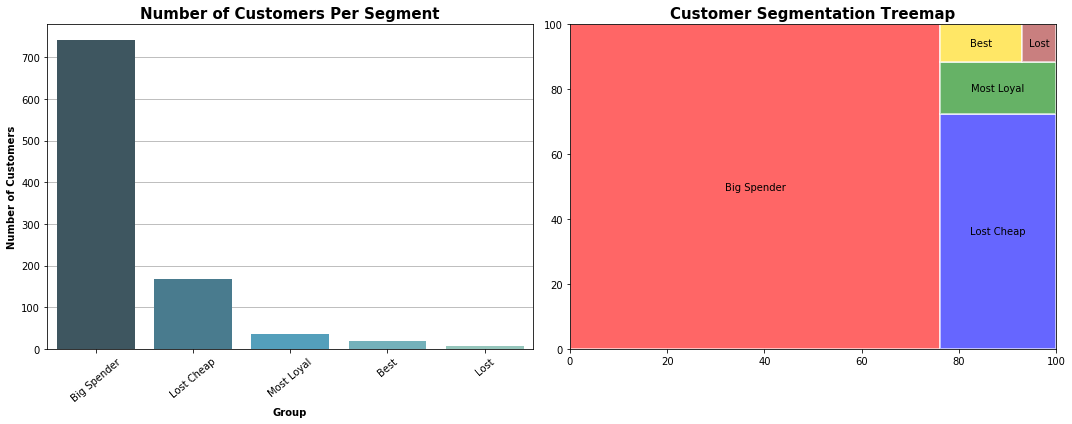

In [31]:
rfm_viz(sorted_cust_dict)

### K-Means Clustering

**K-Means Clustering is another method is segment customers into groups.**  
**Prior to determining clusters, the "Recency", "Frequency", and "Monetary" columns must be transformed and normalized.**


### Outlier Removal - Feature Transformation

In [45]:
def transformation(series):
    Q1_norm = series.quantile(.25)
    Q3_norm = series.quantile(.75)
    IQR_norm = Q3_norm - Q1_norm
    low_out_norm = Q1_norm - 1.5 * IQR_norm
    high_out_norm = Q3_norm + 1.5 * IQR_norm
    num_out_norm = sum(series < low_out_norm) + sum(series > high_out_norm)
    
    tf,_ = stats.boxcox(series)
    tf_series = pd.Series(tf)
    Q1_tf = tf_series.quantile(.25)
    Q3_tf = tf_series.quantile(.75)
    IQR_tf = Q3_tf - Q1_tf
    low_out_tf = Q1_tf - 1.5 * IQR_tf
    high_out_tf = Q3_tf + 1.5 * IQR_tf
    num_out_tf = sum(tf_series < low_out_tf) + sum(tf_series > high_out_tf)
    
    fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (15,8))
    
    sns.boxplot(y = series, ax = axs[0][0])
    axs[0][0].set_title('Boxplot: Before Transformation')
    axs[0][0].set_ylabel('')
    axs[0][0].text(s ='Number of outliers: {}'.format(num_out_norm),
                   x = 0.72, y = 0.9,
                   transform = axs[0][0].transAxes)
    sns.distplot(series, ax = axs[1][0])
    axs[1][0].set_title('Distribution: Before Transformation')
    axs[1][0].set_xlabel('')
    axs[1][0].text(s = 'Kurtosis: {}'.format(series.kurtosis().round(decimals = 2)),
                   x = 0.80, y = 0.9,
                   transform = axs[1][0].transAxes)
    
    sns.boxplot(y = tf_series, ax = axs[0][1])
    axs[0][1].set_title('Boxplot: After Transformation')
    axs[0][1].text(s = 'Number of outliers: {}'.format(num_out_tf),
                   x = 0.72, y = 0.9,
                   transform = axs[0][1].transAxes)
    sns.distplot(tf_series, ax = axs[1][1])
    axs[1][1].set_title('Distribution: After Transformation')
    axs[1][1].text(s = 'Kurtosis: {}'.format(tf_series.kurtosis().round(decimals = 2)),
                   x = 0.80, y = 0.9,
                   transform = axs[1][1].transAxes)
    
    fig.tight_layout()

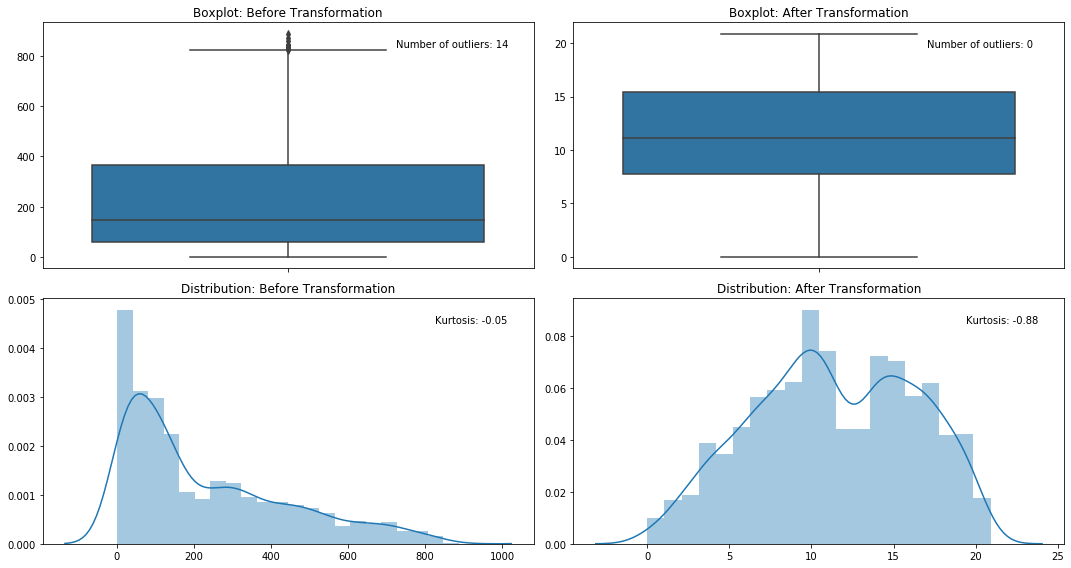

In [46]:
transformation(rfm['Recency'])

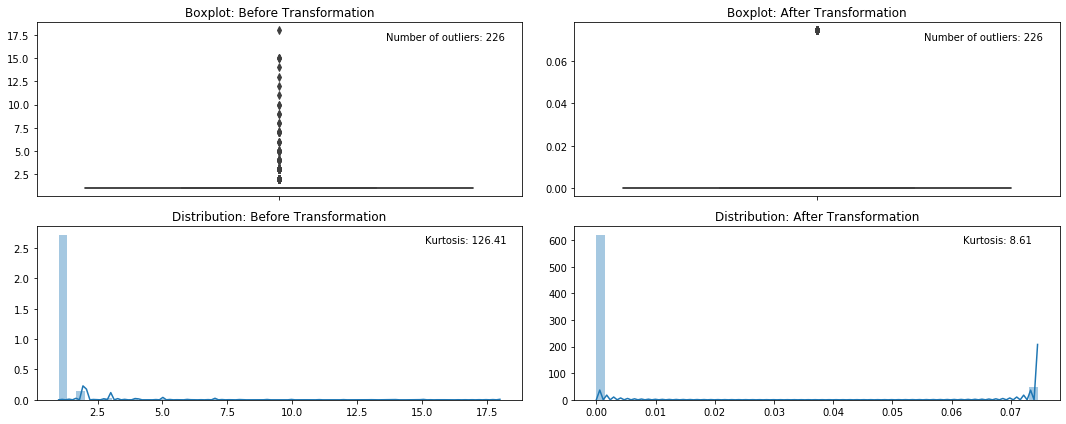

In [34]:
transformation(rfm['Frequency'])

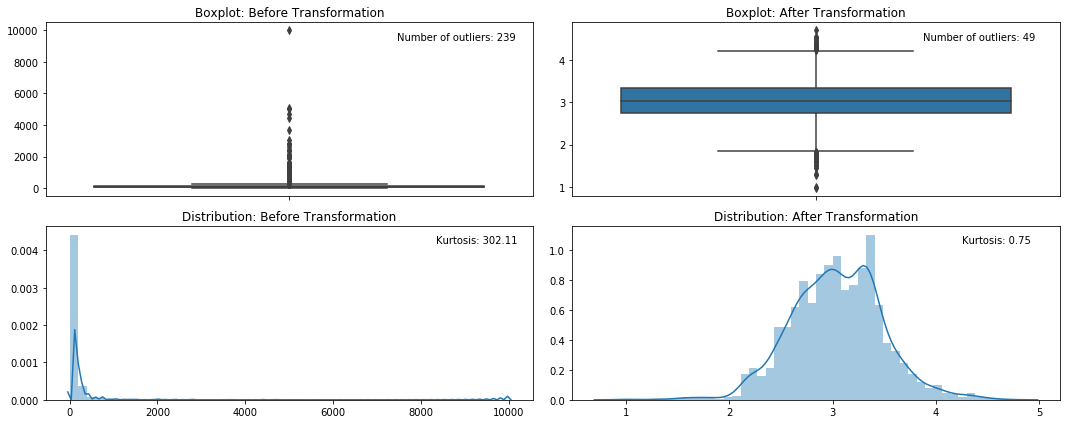

In [35]:
transformation(rfm['Monetary'])

In [36]:
tf_data = rfm[['Recency','Frequency','Monetary']].apply(lambda x : stats.boxcox(x)[0])

In [37]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tf_data)

X = pd.DataFrame(data = scaled_data, index = tf_data.index, columns = tf_data.columns)
X.head()

,Recency,Frequency,Monetary
Customers.id,,,
3,0.547405,0.999909,0.611033
4,1.000000,0.000000,0.432704
5,0.883481,1.000000,0.627925
7,0.993940,0.000000,0.506975
8,0.988572,0.000000,0.554481


**The optimal number of clusters is determined via the Elbow Method.**  
**Conclusion: Since there is a steep drop of interia from 2 clusters to 3 clusters, the optimal number of clusters is 3.**

In [65]:
def elbow_viz(df):
    clus = []
    iner = []

    for i in range(1,11) :
        km = KMeans(n_clusters = i, random_state = 8)
        km.fit(df)
        iner.append(km.inertia_)
        clus.append(i)
    
    fig = plt.figure(figsize = (6,6))

    plt.plot(clus,iner,marker = '.')
    plt.xticks(clus)

    plt.xlabel('Number of Cluster', fontsize = 12)
    plt.ylabel('Inertia', fontsize = 12)

    fig.suptitle('Elbow Method',fontsize = 20)
    fig.tight_layout(rect = [0,0,1,0.95])   

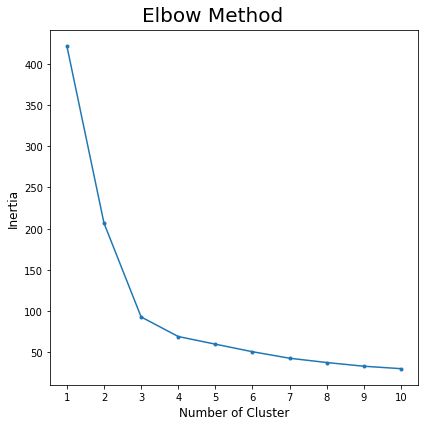

In [66]:
elbow_viz(X)

**The customers are grouped into 3 clusters via KMeans Clustering.**

In [40]:
model = KMeans(n_clusters = 3, random_state = 8)
pred = model.fit_predict(X)

**The Silhouette Score and the Calinski Harabaz Score are stored in a dataframe.**  
* _**The Silhouette Score ranges from -1 to 1 and a higher score indicates well defined clusters.**_
* _**Similar to the Silhouette Score, a higher Calinski Harabaz Score indicates well separated clusters.**_

In [41]:
def metric_df(df,pred):
    sil_score = silhouette_score(df,pred).round(decimals = 3)
    calinski_score = calinski_harabaz_score(df,pred).round(decimals = 3)
    score_list = [sil_score,calinski_score]
    
    metric_mat = pd.DataFrame(data = score_list,
                              index = ['Silhouette','Calinski Harabaz'],
                              columns = ['Score'])
    return metric_mat

In [42]:
metric_df(X,pred)

,Score
Silhouette,0.506
Calinski Harabaz,5402.608


**A dataframe outputting the minimum and maximum values for columns "Recency", "Frequency", and "Monetary" for each cluster is shown below.**  
**A 3D scatter plot outlining the three clusters is also visualized below.**    

In [43]:
rfm['cluster'] = pred
rfm.groupby('cluster')['Recency','Frequency','Monetary'].agg({'Recency' : ('min','max'),
                                                             'Frequency' : ('min','max'),
                                                             'Monetary' : ('min','max')})

Recency      Frequency     Monetary          
            min  max       min max      min       max
cluster                                              
0             1  180         1   1     2.89   2588.00
1           144  888         1   1    13.59   2375.59
2             1  776         2  18    29.22  10007.48

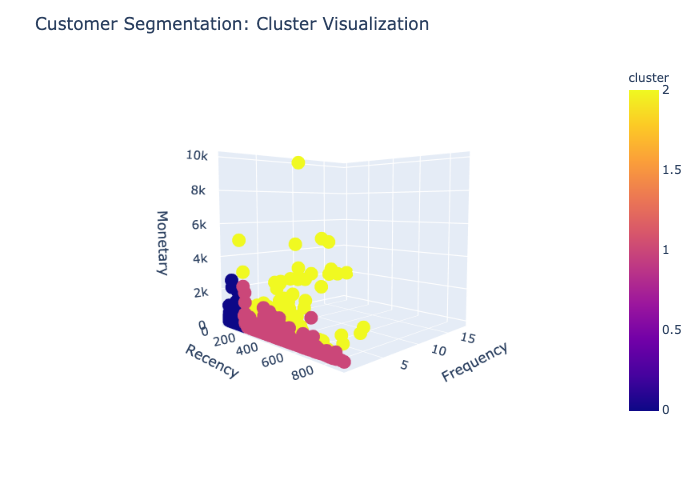

In [44]:
fig = px.scatter_3d(data_frame = rfm, 
              x = 'Recency',
              y = 'Frequency',
              z = 'Monetary',
              color = 'cluster')
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.75, y=-1.75, z=0.2))

fig.update_layout(title = 'Customer Segmentation: Cluster Visualization',
                 scene_camera = camera)

img_bytes = fig.to_image(format="png")
Image(img_bytes)

**After analyzing the min-max table and 3D plot, different approaches can be taken based on the three clusters.**

|**Cluster**|**Customer Purchasing Behavior**|**Approach**|
|-------|----------------------------|--------|
|0|This cluster primarily has new customers.|Try building onboarding support|
|1|Customers in this cluster are one-time<br> visitors who haven't purchased products recently.|Try price incentive strategies.|
|2|These customers are regular buyers.|Try loyalty programs.|